## Exercise 3

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from datetime import datetime
%matplotlib inline

In [76]:
# load dataset2 seasons stats
seasons_stats_ds1 = pd.read_csv('dataset1/Seasons_Stats.csv',index_col=0)
seasons_stats_ds1.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [77]:
seasons_stats_ds1 = seasons_stats_ds1[seasons_stats_ds1.Year >= 1981]
seasons_stats_ds1 = seasons_stats_ds1[(seasons_stats_ds1.Age >= 18) & (seasons_stats_ds1.Age <= 40)]
seasons_stats_ds1 = seasons_stats_ds1[seasons_stats_ds1.MP > 500]
seasons_stats_ds1 = seasons_stats_ds1[seasons_stats_ds1['Pos'].isin(['PG','SG','SF','PF','C'])]
seasons_stats_ds1.reset_index(inplace=True,drop=True)
seasons_stats_ds1.size

639080

In [78]:
# load dataset 2 files
ds2_games_details = pd.read_csv('dataset2/games_details.csv',dtype=object)

ds2_games = pd.read_csv('dataset2/games.csv')

ds2_players = pd.read_csv('dataset2/players.csv')

ds2_ranking = pd.read_csv('dataset2/ranking.csv')

ds2_teams = pd.read_csv('dataset2/teams.csv')

ds2_games_details

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626106,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
626107,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
626108,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
626109,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


### Part A

1. Points per game histogram with 100 bins
2. Points per game Log histogram with 100 bins
3. Points per game Log histogram with 100 bins custom
4. Zipf plot

In [5]:
points = seasons_stats_ds1['PTS']

points = points.to_frame()
points.head()

,PTS
0,2095.0
1,1115.0
2,1106.0
3,102.0
4,1145.0


In [6]:
# find max, min
maxf = points['PTS'][0]
minf = points['PTS'][0]
for i in range(len(points)):
    if points['PTS'][i] > maxf:
        maxf = points['PTS'][i]
    if points['PTS'][i] < minf:
        minf = points['PTS'][i]

bins1 = [0]* 100
binsize = (maxf-minf)/100

for i in range(len(points)):
    binsize = (maxf-minf)/100
    minBin = minf
    for j in range(100):
        if(points['PTS'][i] >= minBin and points['PTS'][i] < minBin + (maxf-minf)/100):
            bins1[j] = bins1[j] + 1
        minBin = minf + binsize
        binsize = binsize + (maxf-minf)/100


In [7]:
sorted_points = np.sort(points['PTS'])
sorted_points = sorted_points[::-1]
sorted_points = sorted_points[~np.isnan(sorted_points)]
rank = [0] * len(points)
#for i in range(len(points)):
#    rank[i] = 
#sorted_points

Text(0.5, 1.0, 'PTS Zipf plot')

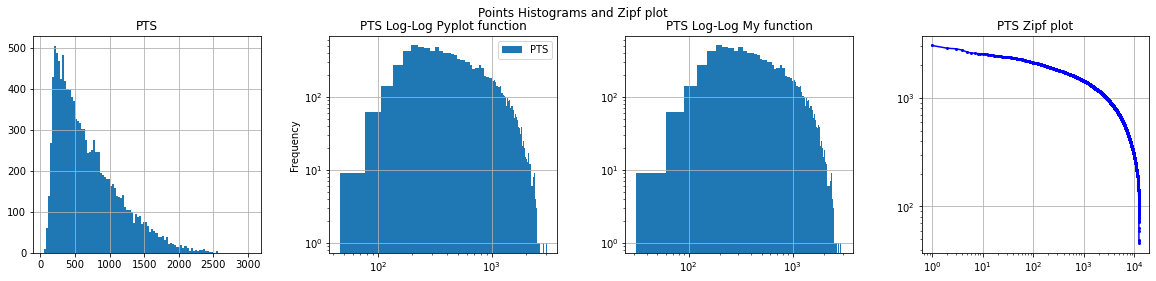

In [8]:
# plotting
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,4))
fig.suptitle('Points Histograms and Zipf plot')

#1
points.hist(bins=100,ax=axes[0])

#2
points.plot(kind='hist',bins=100,logy=True,logx=True,grid=True,ax=axes[1])
axes[1].set_title('PTS Log-Log Pyplot function')

#3
axes[2].bar(x=np.arange(minf,maxf,(maxf-minf)/100),height=bins1,width=(maxf-minf)/100)
axes[2].grid()
axes[2].set_xscale('log')
axes[2].set_yscale('log')
axes[2].set_title('PTS Log-Log My function')

#4
axes[3].plot(np.arange(1,sorted_points.size+1),sorted_points,'-bo',markersize=2)
axes[3].grid()
axes[3].set_xscale('log')
axes[3].set_yscale('log')
axes[3].set_title('PTS Zipf plot')


#### Συμπεράσματα:
Φαίνεται από τα διαγράμματα ότι οι περισσότεροι παίκτες σκοράρουν στο διάστημα 250-750 πόντους, με λίγους παίκτες να σκοράρουν χαμηλότερα και περισσότερους ψηλότερα. H κατανομή έχει δεξιά ουρά.

### Part B

1. Look fields PER, TS% 

2. Calculate fields : 
    * Points Per Game (PPG),
    * Assists Per Game (APG), 
    * Total Rebounds Per Game (RPG), 
    * Blocks Per Game (BPG) 
   
    ανά σαιζόν.

In [71]:
seasons_stats_ds1.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,PF,PTS,PPG,APG,RPG,BPG,PPG_group,APG_group,RPG_group,BPG_group
0,1981.0,Kareem Abdul-Jabbar*,C,33.0,LAL,80.0,NaN,2976.0,25.5,0.616,...,244.0,2095.0,26.187500,3.400000,10.262500,2.850000,11.007744,2.697794,4.355831,0.526099
1,1981.0,Alvan Adams,C,26.0,PHO,75.0,NaN,2054.0,20.3,0.567,...,226.0,1115.0,14.866667,4.586667,7.280000,0.920000,11.007744,2.697794,4.355831,0.526099
2,1981.0,Tiny Archibald*,PG,32.0,BOS,80.0,72.0,2820.0,14.3,0.582,...,201.0,1106.0,13.825000,7.725000,2.200000,0.225000,11.007744,2.697794,4.355831,0.526099
3,1981.0,Dennis Awtrey,C,32.0,SEA,47.0,NaN,607.0,6.7,0.501,...,85.0,102.0,2.170213,1.148936,2.297872,0.170213,11.007744,2.697794,4.355831,0.526099
4,1981.0,James Bailey,PF,23.0,SEA,82.0,NaN,2539.0,14.5,0.546,...,332.0,1145.0,13.963415,1.195122,7.402439,1.743902,11.007744,2.697794,4.355831,0.526099


In [30]:
# points per game
seasons_stats_ds1['PPG'] = (seasons_stats_ds1['PTS']/seasons_stats_ds1['G'])
# assists per game
seasons_stats_ds1['APG'] = (seasons_stats_ds1['AST']/seasons_stats_ds1['G'])
# total rebounds per game
seasons_stats_ds1['RPG'] = (seasons_stats_ds1['TRB']/seasons_stats_ds1['G'])
# total blocks per game
seasons_stats_ds1['BPG'] = (seasons_stats_ds1['BLK']/seasons_stats_ds1['G'])

# per game per season calculate
seasons_stats_ds1['PPG_group'] = seasons_stats_ds1.groupby('Year')['PPG'].transform('mean')
seasons_stats_ds1['APG_group'] = seasons_stats_ds1.groupby('Year')['APG'].transform('mean')
seasons_stats_ds1['RPG_group'] = seasons_stats_ds1.groupby('Year')['RPG'].transform('mean')
seasons_stats_ds1['BPG_group'] = seasons_stats_ds1.groupby('Year')['BPG'].transform('mean')


Text(0.5, 1.0, '6')

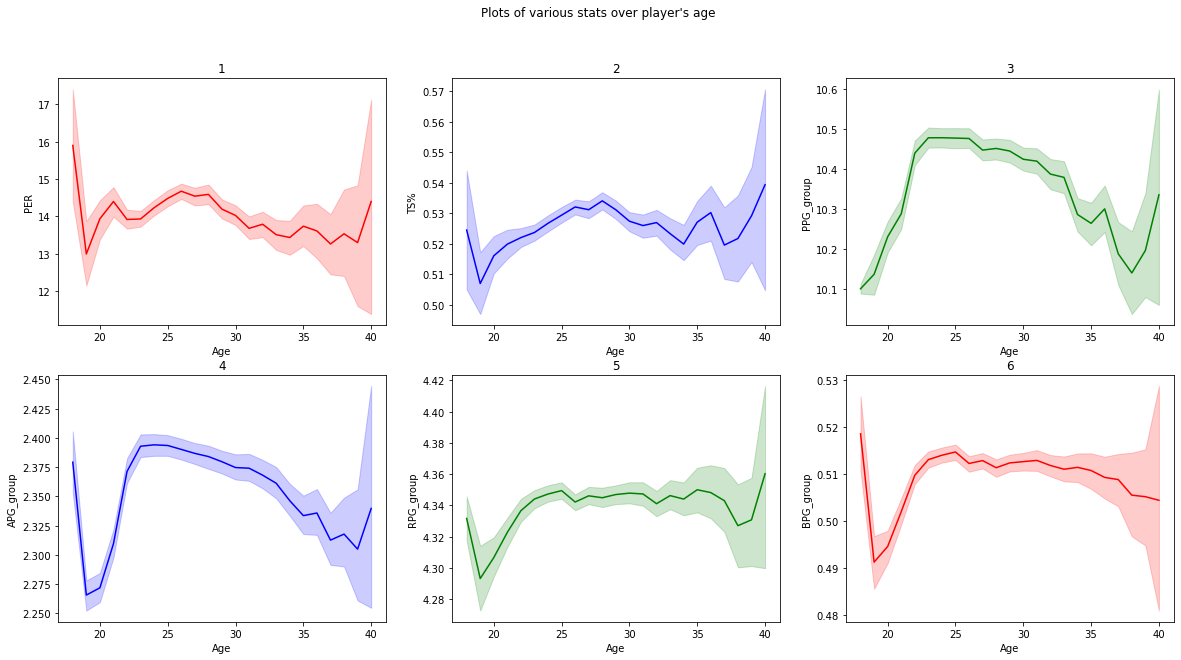

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
fig.suptitle('Plots of various stats over player\'s age')

sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.PER,ax=axes[0][0],color='r').set_title('1')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1['TS%'],ax=axes[0][1],color='b').set_title('2')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.PPG_group,ax=axes[0][2],color='g').set_title('3')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.APG_group,ax=axes[1][0],color='b').set_title('4')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.RPG_group,ax=axes[1][1],color='g').set_title('5')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.BPG_group,ax=axes[1][2],color='r').set_title('6')


### Παρατηρήσεις:
Από τα τέσσερα πρώτα γραφήματα φαίνεται ότι οι παίχτες πιάνουν την κορυφή της καριέρας τους γύρω στα 25-27 χρόνια. Το γράφημα 5 με τα rebound είναι σχετικά ίσο σε όλες τις ηλικίες. Στα block στο γράφημα 6 φαίνεται ότι οι παίχτες είναι καλύτεροι γύρω στα ~24 χρόνια.

Text(0.5, 1.0, '6')

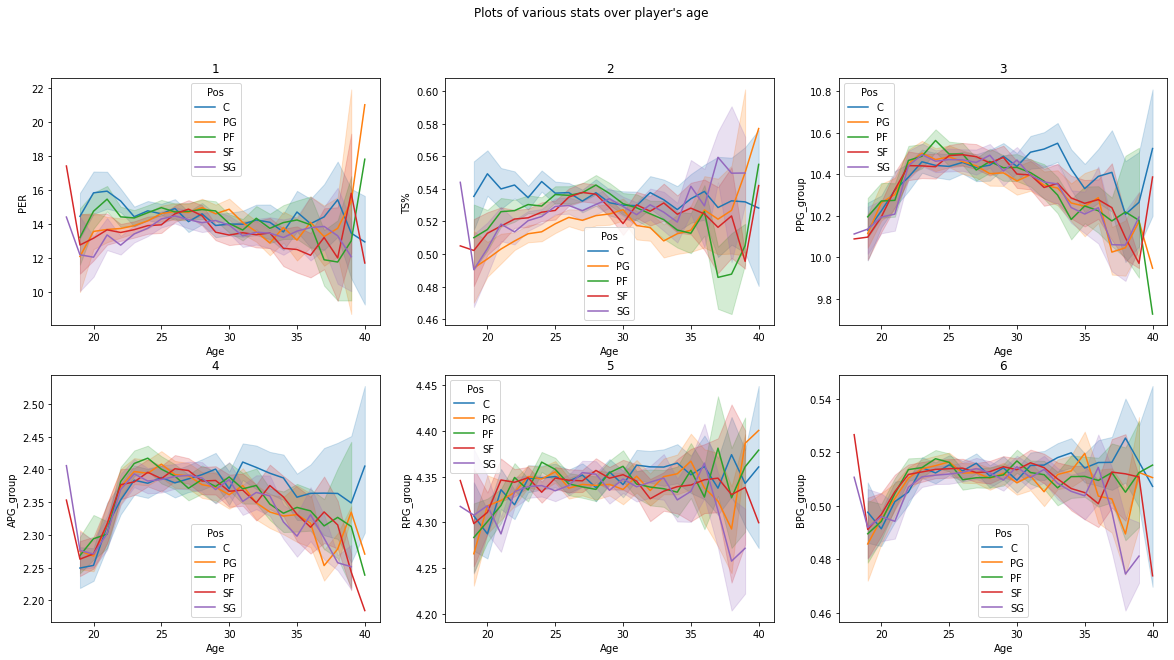

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
fig.suptitle('Plots of various stats over player\'s age')

sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.PER,ax=axes[0][0],color='r',hue=seasons_stats_ds1['Pos']).set_title('1')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1['TS%'],ax=axes[0][1],color='b',hue=seasons_stats_ds1['Pos']).set_title('2')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.PPG_group,ax=axes[0][2],color='g',hue=seasons_stats_ds1['Pos']).set_title('3')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.APG_group,ax=axes[1][0],color='b',hue=seasons_stats_ds1['Pos']).set_title('4')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.RPG_group,ax=axes[1][1],color='g',hue=seasons_stats_ds1['Pos']).set_title('5')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.BPG_group,ax=axes[1][2],color='r',hue=seasons_stats_ds1['Pos']).set_title('6')


### Παρατηρήσεις:
Τo διαγράμμα Player Efficiency Rating (PER) δεν παρουσιάζει μεγάλες διαφορές μεταξύ των θέσεων, με τις θέσεις PG,PF να είναι ελάχιστα μεγαλύτερες στα ~27 έτη.

Το true shooting % (ts%) παρουσιάζει ελάχιστες διαφορές μεταξύ των θέσεων, ενώ η θέση PG είναι η χαμηλότερη στ ~27 έτη. Το διάγραμμα APG δείχνει άνοδο ως τα 24-25 και ύστερα μια καθοδική πορεία.

Τα υπόλοιπα διαγράμματα δεν έχουν εμφανείς διαφορές στις θέσεις.

### Part C

Text(0.5, 1.0, '6')

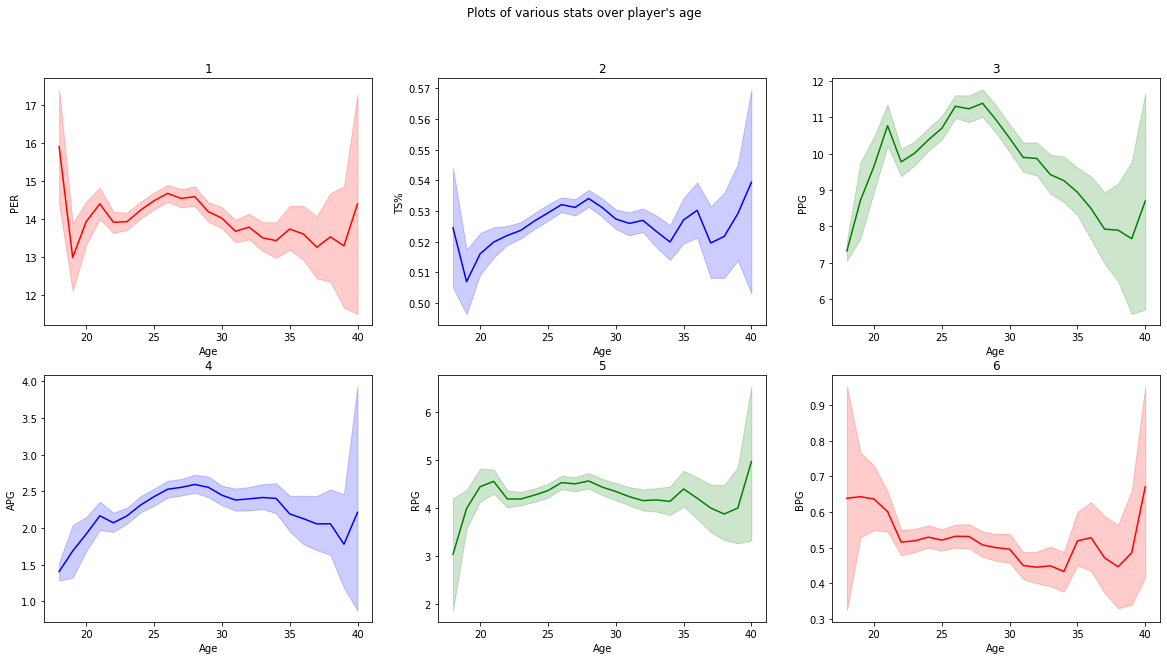

In [33]:
# stats not grouped by year
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
fig.suptitle('Plots of various stats over player\'s age')

sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.PER,ax=axes[0][0],color='r').set_title('1')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1['TS%'],ax=axes[0][1],color='b').set_title('2')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.PPG,ax=axes[0][2],color='g').set_title('3')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.APG,ax=axes[1][0],color='b').set_title('4')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.RPG,ax=axes[1][1],color='g').set_title('5')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.BPG,ax=axes[1][2],color='r').set_title('6')

Text(0.5, 1.0, '6')

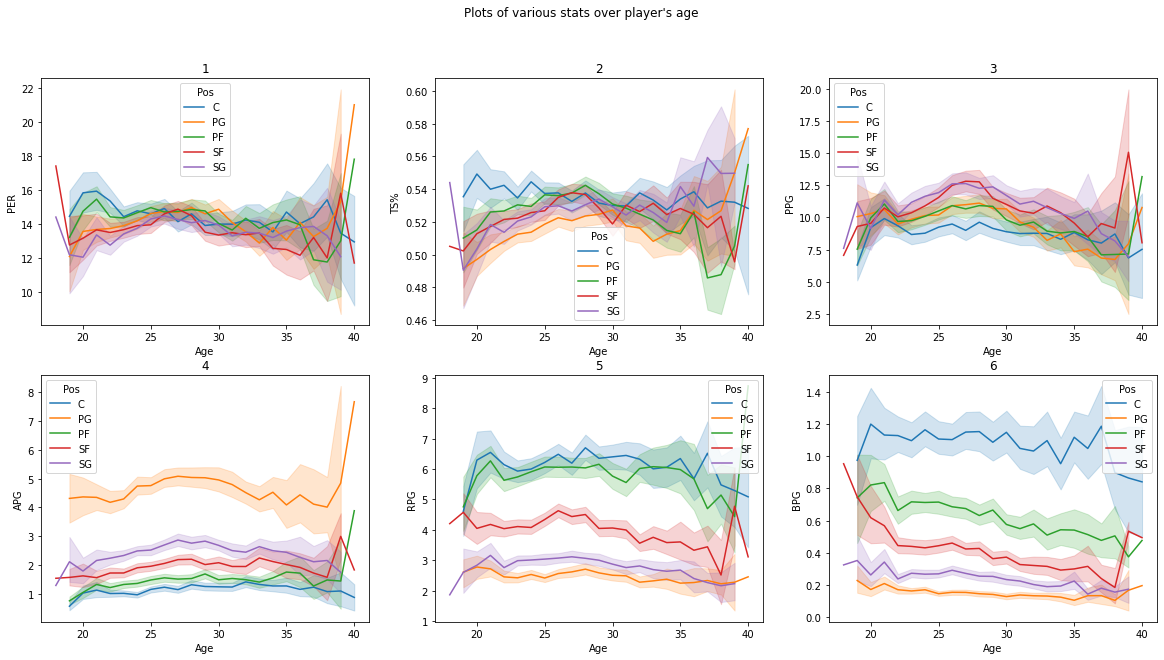

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
fig.suptitle('Plots of various stats over player\'s age')

sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.PER,ax=axes[0][0],color='r',hue=seasons_stats_ds1['Pos']).set_title('1')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1['TS%'],ax=axes[0][1],color='b',hue=seasons_stats_ds1['Pos']).set_title('2')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.PPG,ax=axes[0][2],color='g',hue=seasons_stats_ds1['Pos']).set_title('3')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.APG,ax=axes[1][0],color='b',hue=seasons_stats_ds1['Pos']).set_title('4')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.RPG,ax=axes[1][1],color='g',hue=seasons_stats_ds1['Pos']).set_title('5')
sns.lineplot(x=seasons_stats_ds1.Age,y=seasons_stats_ds1.BPG,ax=axes[1][2],color='r',hue=seasons_stats_ds1['Pos']).set_title('6')

### Παρατηρήσεις:
Τo διαγράμμα Player Efficiency Rating (PER) δεν παρουσιάζει μεγάλες διαφορές μεταξύ των θέσεων, με τις θέσεις PG,PF να είναι ελάχιστα μεγαλύτερες στα ~27 έτη.

Το true shooting % (ts%) παρουσιάζει ελάχιστες διαφορές μεταξύ των θέσεων, ενώ η θέση PG είναι η χαμηλότερη στ ~27 έτη.

Στο διάγραμμα πόντων ανα παιχνίδι (PPG) η θέση C είναι χαμηλότερα, στη μέση βρίσκονται οι PG,PF και παραπάνω οι SF,SG, το οποίο είναι σε αντιστοιχία με το ποιες θέσεις πραγματοποιούν τις περισσότερες βολές θεωρητικά.

Στο διάγραμμα APG, φαίνεται ότι η θέση PG κάνει αρκετές assist.

Το διάγραμμα RPG δείχνει μια διαβάθμιση, με τις θέσεις C,PF να έχουν αρκετά rebound και τις θέσεις PG,SG λίγα.

Το διάγραμμα blocks per game (BPG) έχει εμφανή διαφορά μεταξύ των θέσεων.
 β

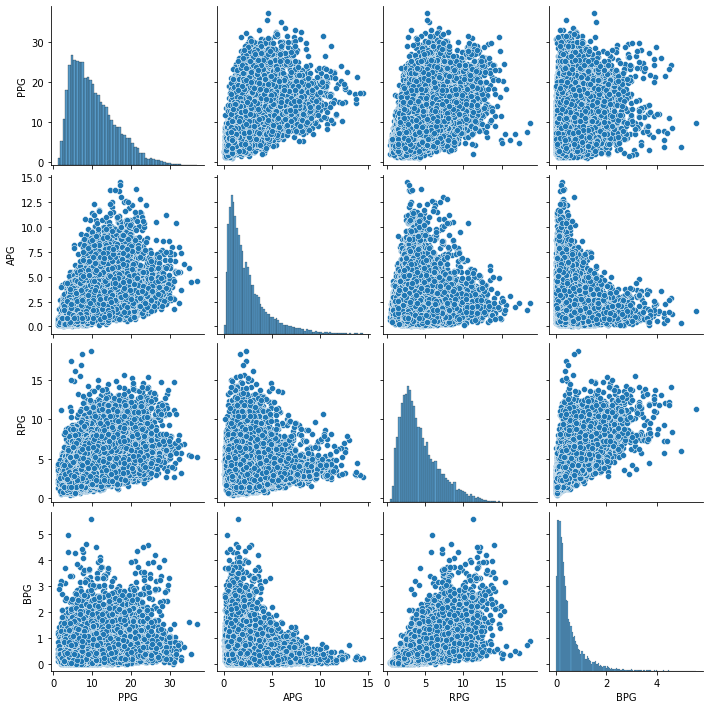

In [35]:
sns.pairplot(seasons_stats_ds1[['PPG','APG','RPG','BPG']])
#seasons_stats_ds1[['PER','TS%']]

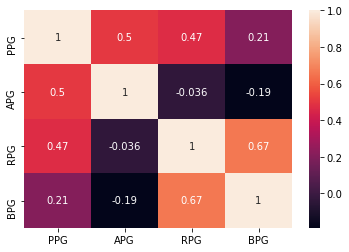

In [36]:
_ = sns.heatmap(seasons_stats_ds1[['PPG','APG','RPG','BPG']].corr(),annot=True)

### Παρατηρήσεις
Από το pairplot φαίνονται κάποιες συσχετίσεις με καλές coefficient. Στο heatmap μικρό p-value έχει η συσχέτιση μεταξύ assist per game(APG) και rebounds per game RPG)

### Part D:

<AxesSubplot:xlabel='Pos', ylabel='BPG'>

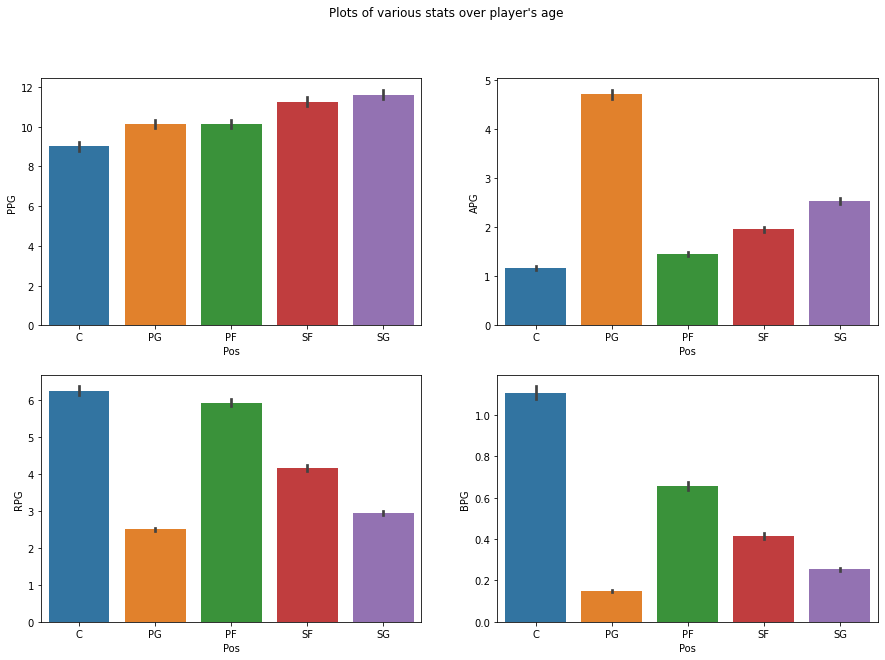

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
fig.suptitle('Plots of various stats over player\'s age')

sns.barplot(x=seasons_stats_ds1['Pos'],y=seasons_stats_ds1['PPG'],ax=axes[0][0],ci=95)
sns.barplot(x=seasons_stats_ds1['Pos'],y=seasons_stats_ds1['APG'],ax=axes[0][1],ci=95)
sns.barplot(x=seasons_stats_ds1['Pos'],y=seasons_stats_ds1['RPG'],ax=axes[1][0],ci=95)
sns.barplot(x=seasons_stats_ds1['Pos'],y=seasons_stats_ds1['BPG'],ax=axes[1][1],ci=95)

### Παρατηρήσεις

Στο ppg οι θέσεις είναι αρκετά κοντά μεταξύ τους.

Στο διάγραμμα assist (APG) ξεχωρίζει η θέση PG.

Στο RPG οι θέσεις C, PF είναι αρκετά ψηλά, οι θέσεις PG,SG είναι χαμηλά και μεσαία είναι η θέση SF.

Tα blocks (BPG) ακολουθούν κατανομή παρόμοια με το προηγούμενο διάγραμμα RPG, με μόνη διαφορά τη θέση PF.

<AxesSubplot:xlabel='Pos', ylabel='PER'>

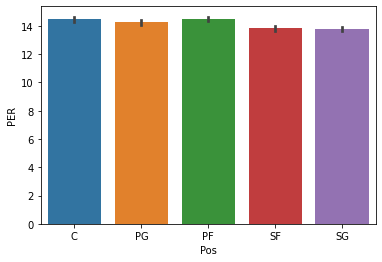

In [38]:
sns.barplot(x=seasons_stats_ds1['Pos'],y=seasons_stats_ds1['PER'])

In [39]:
import scipy as sp #library for scientific computations 
from scipy import stats #The statistics part of the library

In [40]:
C_group = seasons_stats_ds1.groupby('Pos').get_group('C').PER
PG_group = seasons_stats_ds1.groupby('Pos').get_group('PG').PER
PF_group = seasons_stats_ds1.groupby('Pos').get_group('PF').PER
SF_group = seasons_stats_ds1.groupby('Pos').get_group('SF').PER
SG_group = seasons_stats_ds1.groupby('Pos').get_group('SG').PER


In [41]:
# t test of all position combinations 
C_PG = stats.ttest_ind(C_group,PG_group,equal_var=False)
C_PF = stats.ttest_ind(C_group,PF_group,equal_var=False)
C_SF = stats.ttest_ind(C_group,SF_group,equal_var=False)
C_SG = stats.ttest_ind(C_group,SG_group,equal_var=False)
PG_PF = stats.ttest_ind(PG_group,PF_group,equal_var=False)
PG_SF = stats.ttest_ind(PG_group,SF_group,equal_var=False)
PG_SG = stats.ttest_ind(PG_group,SG_group,equal_var=False)
PF_SF = stats.ttest_ind(PF_group,SF_group,equal_var=False)
PF_SG = stats.ttest_ind(PF_group,SG_group,equal_var=False)
SF_SG = stats.ttest_ind(SF_group,SG_group,equal_var=False)

print(C_PG)
print(C_PF)
print(C_SF)
print(C_SG)
print(PG_PF)
print(PG_SF)
print(PG_SG)
print(PF_SF)
print(PF_SG)
print(SF_SG)

p_values = [C_PG[1],
           C_PF[1],
           C_SF[1],
           C_SG[1],
           PG_PF[1],
           PG_SF[1],
           PG_SG[1],
           PF_SF[1],
           PF_SG[1],
           SF_SG[1]]

Ttest_indResult(statistic=1.9141907406964558, pvalue=0.055657175091369505)
Ttest_indResult(statistic=-0.1152105619927795, pvalue=0.9082831274390802)
Ttest_indResult(statistic=5.416402960664351, pvalue=6.38704103347495e-08)
Ttest_indResult(statistic=5.839964919788012, pvalue=5.577398807664308e-09)
Ttest_indResult(statistic=-2.209833889580768, pvalue=0.027161204243760926)
Ttest_indResult(statistic=3.870320828401545, pvalue=0.00011010097403840765)
Ttest_indResult(statistic=4.323718603417247, pvalue=1.5643941121360285e-05)
Ttest_indResult(statistic=6.002248981659244, pvalue=2.083610133995781e-09)
Ttest_indResult(statistic=6.4733738739493205, pvalue=1.0498956817219622e-10)
Ttest_indResult(statistic=0.40403737408888496, pvalue=0.6862029733974091)


<AxesSubplot:>

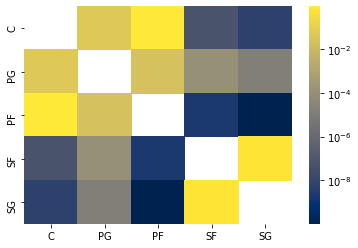

In [42]:
from matplotlib.colors import LogNorm
p_values_2d = [[0.0,C_PG[1],C_PF[1],C_SF[1],C_SG[1]],
              [C_PG[1],0.0,PG_PF[1],PG_SF[1],PG_SG[1]],
              [C_PF[1],PG_PF[1],0.0,PF_SF[1],PF_SG[1],],
              [C_SF[1],PG_SF[1],PF_SF[1],0.0,SF_SG[1]],
              [C_SG[1],PG_SG[1],PF_SG[1],SF_SG[1],0.0]]

ticks = ['C','PG','PF','SF','SG']
sns.heatmap(p_values_2d,norm=LogNorm(),cmap='cividis',yticklabels=ticks,xticklabels=ticks) # log scale of colormap


### Παρατηρήσεις
Μεγάλο p-value>0.05 έχουν τα t-test μεταξύ των C-PF και SF-SG, που σημαίνει ότι αυτές οι θέσεις δεν έχουν ισχυρή συσχέτιση μεταξύ τους στο PER.

### Part E:

In [84]:
rw_games = ds2_games_details[ds2_games_details.PLAYER_ID=='201566'].copy()
rw_games['TEAM_ID'] = rw_games['TEAM_ID'].astype(int)
rw_games['GAME_ID'] = rw_games['GAME_ID'].astype(int)
#print(rw_games['TEAM_ID'].unique())
rw_games.reset_index(inplace=True,drop=True)
rw_games.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100219,1610612747,LAL,Los Angeles,201566,Russell Westbrook,Russell,G,NaN,35:38,...,1.0,3.0,4.0,15.0,1.0,0.0,3.0,3.0,19.0,3.0
1,22100209,1610612747,LAL,Los Angeles,201566,Russell Westbrook,Russell,G,NaN,31:15,...,0.0,6.0,6.0,8.0,1.0,0.0,4.0,3.0,25.0,-13.0
2,22100192,1610612747,LAL,Los Angeles,201566,Russell Westbrook,Russell,G,NaN,34:17,...,1.0,10.0,11.0,7.0,2.0,0.0,7.0,3.0,14.0,11.0
3,22100184,1610612747,LAL,Los Angeles,201566,Russell Westbrook,Russell,G,NaN,30:53,...,0.0,5.0,5.0,3.0,0.0,0.0,5.0,1.0,20.0,-32.0
4,22100170,1610612747,LAL,Los Angeles,201566,Russell Westbrook,Russell,G,NaN,43:21,...,1.0,11.0,12.0,14.0,1.0,2.0,8.0,5.0,25.0,10.0


In [86]:
#g = games played by westbrook's teams
g = ds2_games[ds2_games['GAME_ID'].isin(rw_games['GAME_ID'])].copy()

# wins of westbrook's team
wins = g[(((g['HOME_TEAM_ID'].isin(rw_games['TEAM_ID'])) & (g['HOME_TEAM_WINS'] == 1)) |
          ((g['VISITOR_TEAM_ID'].isin(rw_games['TEAM_ID'])) & (g['HOME_TEAM_WINS'] == 0)))]

wins.reset_index(inplace=True,drop=True)

wins = pd.merge(wins,rw_games[['GAME_ID','TEAM_ID']],on=['GAME_ID'])

# remove games with teams that westbrook played in the past and his current team lost the game
wins = wins.drop(wins[(((wins['HOME_TEAM_ID'].isin(rw_games['TEAM_ID'])) & (wins['VISITOR_TEAM_ID'].isin(rw_games['TEAM_ID'])) & (wins['HOME_TEAM_ID']==wins['TEAM_ID']) & (wins['HOME_TEAM_WINS'] == 0)) |
     ((wins['HOME_TEAM_ID'].isin(rw_games['TEAM_ID'])) & (wins['VISITOR_TEAM_ID'].isin(rw_games['TEAM_ID'])) & (wins['VISITOR_TEAM_ID']==wins['TEAM_ID']) & (wins['HOME_TEAM_WINS'] == 1)))
    ].index)

wins.reset_index(inplace=True,drop=True)
wins
#g

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,TEAM_ID
0,2021-11-14,22100192,Final,1610612747,1610612759,2021,1610612747,114.0,0.518,0.765,...,46.0,1610612759,106.0,0.444,0.667,0.444,28.0,43.0,1,1610612747
1,2021-11-10,22100170,Final,1610612747,1610612748,2021,1610612747,120.0,0.500,0.625,...,50.0,1610612748,117.0,0.417,0.771,0.270,26.0,47.0,1,1610612747
2,2021-11-08,22100154,Final,1610612747,1610612766,2021,1610612747,126.0,0.484,0.714,...,51.0,1610612766,123.0,0.434,0.821,0.333,23.0,55.0,1,1610612747
3,2021-11-02,22100107,Final,1610612747,1610612745,2021,1610612747,119.0,0.527,0.750,...,43.0,1610612745,117.0,0.527,0.417,0.381,27.0,38.0,1,1610612747
4,2021-10-31,22100093,Final,1610612747,1610612745,2021,1610612747,95.0,0.406,0.615,...,43.0,1610612745,85.0,0.421,0.517,0.214,18.0,55.0,1,1610612747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,2014-11-12,21400111,Final,1610612738,1610612760,2014,1610612738,94.0,0.446,0.846,...,35.0,1610612760,109.0,0.488,0.864,0.417,23.0,41.0,0,1610612760
669,2014-11-09,21400092,Final,1610612760,1610612758,2014,1610612760,101.0,0.462,0.852,...,40.0,1610612758,93.0,0.450,0.682,0.250,23.0,37.0,1,1610612760
670,2014-11-01,21400036,Final,1610612760,1610612743,2014,1610612760,102.0,0.463,0.710,...,41.0,1610612743,91.0,0.438,0.700,0.269,19.0,41.0,1,1610612760
671,2014-10-14,11400051,Final,1610612760,1610612763,2014,1610612760,117.0,0.533,0.939,...,33.0,1610612763,107.0,0.506,0.680,0.400,19.0,33.0,1,1610612760


In [87]:
rw_games_rel_info = rw_games[['GAME_ID','TEAM_ID','PLAYER_ID','REB','AST','STL','BLK','PTS']].copy()

rw_games_rel_info = rw_games_rel_info[rw_games_rel_info['GAME_ID'].isin(wins['GAME_ID'])]

rw_games_rel_info.reset_index(inplace=True,drop=True)

rw_games_rel_info[['REB','AST','STL','BLK','PTS']] = rw_games_rel_info[['REB','AST','STL','BLK','PTS']].astype(float)
rw_games_rel_info

,GAME_ID,TEAM_ID,PLAYER_ID,REB,AST,STL,BLK,PTS
0,22100192,1610612747,201566,11.0,7.0,2.0,0.0,14.0
1,22100170,1610612747,201566,12.0,14.0,1.0,2.0,25.0
2,22100154,1610612747,201566,12.0,14.0,3.0,0.0,17.0
3,22100107,1610612747,201566,9.0,7.0,0.0,0.0,27.0
4,22100093,1610612747,201566,8.0,9.0,1.0,0.0,20.0
...,...,...,...,...,...,...,...,...
668,21200022,1610612760,201566,5.0,6.0,0.0,0.0,32.0
669,11200101,1610612760,201566,9.0,6.0,2.0,1.0,8.0
670,11200087,1610612760,201566,1.0,9.0,1.0,2.0,11.0
671,11200074,1610612760,201566,0.0,12.0,1.0,0.0,18.0


In [88]:
# calculate td for each game (3 of PTS,AST,BLK,REB,STL at least double digit) from game_details
def calculate_TD(row):
    doubleDigitCounter = 0
    if (row['REB'] >= 10):
        doubleDigitCounter +=1
    if (row['AST'] >= 10):
        doubleDigitCounter +=1
    if (row['STL'] >= 10):
        doubleDigitCounter +=1
    if (row['BLK'] >= 10):
        doubleDigitCounter +=1
    if (row['PTS'] >= 10):
        doubleDigitCounter +=1
        
    if (doubleDigitCounter >= 3):
        return 1
    else:
        return 0
    
rw_games_rel_info['TD'] = rw_games_rel_info.apply(calculate_TD,axis=1)
print('Total games that westbrook played: ',g['GAME_ID'].size)
print('Total games that westbrook played and his team won: ',rw_games_rel_info['GAME_ID'].size)
print('Total games that westbrook played and his team won, and he achieved triple-double: ',rw_games_rel_info[(rw_games_rel_info['TD']==1)]['TD'].size,'\n')

rw_games_rel_info

Total games that westbrook played:  1168
Total games that westbrook played and his team won:  673
Total games that westbrook played and his team won, and he achieved triple-double:  147 



,GAME_ID,TEAM_ID,PLAYER_ID,REB,AST,STL,BLK,PTS,TD
0,22100192,1610612747,201566,11.0,7.0,2.0,0.0,14.0,0
1,22100170,1610612747,201566,12.0,14.0,1.0,2.0,25.0,1
2,22100154,1610612747,201566,12.0,14.0,3.0,0.0,17.0,1
3,22100107,1610612747,201566,9.0,7.0,0.0,0.0,27.0,0
4,22100093,1610612747,201566,8.0,9.0,1.0,0.0,20.0,0
...,...,...,...,...,...,...,...,...,...
668,21200022,1610612760,201566,5.0,6.0,0.0,0.0,32.0,0
669,11200101,1610612760,201566,9.0,6.0,2.0,1.0,8.0,0
670,11200087,1610612760,201566,1.0,9.0,1.0,2.0,11.0,0
671,11200074,1610612760,201566,0.0,12.0,1.0,0.0,18.0,0


In [89]:
# prob of win = number of wins /  number of all the matches with the player  (wins/g)
prob_of_win = rw_games_rel_info['GAME_ID'].size / g['GAME_ID'].size
print('Probability of win: ',prob_of_win)

Probability of win:  0.5761986301369864


In [90]:
# wins_td : td == true for the game   *   prob of win
prob_of_win_td = (rw_games_rel_info[(rw_games_rel_info['TD']==1)]['TD'].size / rw_games_rel_info['GAME_ID'].size) * prob_of_win
print('Probability of win with triple double: ',prob_of_win_td)

Probability of win with triple double:  0.12585616438356165


In [91]:
cdf = pd.crosstab(rw_games_rel_info['TD'],rw_games_rel_info['GAME_ID'])
cdf

GAME_ID,10800045,10900048,10900058,11000012,11000091,11000107,11100011,11100019,11200055,11200074,...,41500314,41600163,41700171,41700175,41800163,41900175,41900177,41900221,42000104,52000201
TD,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [92]:
stats.chi2_contingency(cdf)

(672.9999999999998,
 0.48187527455308304,
 672,
 array([[0.78157504, 0.78157504, 0.78157504, ..., 0.78157504, 0.78157504,
         0.78157504],
        [0.21842496, 0.21842496, 0.21842496, ..., 0.21842496, 0.21842496,
         0.21842496]]))

### Παρατηρήσεις
Η νίκη της ομάδας του Westbrook και το αν έχει triple-double είναι ανεξάρτητα μεταξύ τους. Η πιθανότητα νίκης γενικά είναι 0.5761986301369864 και η πιθανότητα νίκης ενώ έχει πετύχει triple-double είναι 0.12585616438356165. Στο $χ^2$ test το p-value είναι 0.481.

### Part Z:

In [93]:
seasons_stats_ds1
pg_sg = seasons_stats_ds1[((seasons_stats_ds1['Pos']=='PG') | (seasons_stats_ds1['Pos']=='SG'))]
sf_pf_c = seasons_stats_ds1[((seasons_stats_ds1['Pos']=='SF') | (seasons_stats_ds1['Pos']=='PF') | (seasons_stats_ds1['Pos']=='C'))]
#pg_sg
sf_pf_c


,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1981.0,Kareem Abdul-Jabbar*,C,33.0,LAL,80.0,NaN,2976.0,25.5,0.616,...,0.766,197.0,624.0,821.0,272.0,59.0,228.0,249.0,244.0,2095.0
1,1981.0,Alvan Adams,C,26.0,PHO,75.0,NaN,2054.0,20.3,0.567,...,0.768,157.0,389.0,546.0,344.0,106.0,69.0,226.0,226.0,1115.0
3,1981.0,Dennis Awtrey,C,32.0,SEA,47.0,NaN,607.0,6.7,0.501,...,0.700,33.0,75.0,108.0,54.0,12.0,8.0,33.0,85.0,102.0
4,1981.0,James Bailey,PF,23.0,SEA,82.0,NaN,2539.0,14.5,0.546,...,0.709,192.0,415.0,607.0,98.0,74.0,143.0,219.0,332.0,1145.0
5,1981.0,Greg Ballard,SF,26.0,WSB,82.0,NaN,2610.0,16.7,0.500,...,0.847,167.0,413.0,580.0,195.0,118.0,39.0,117.0,194.0,1271.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12285,2017.0,Thaddeus Young,PF,28.0,IND,74.0,74.0,2237.0,14.9,0.562,...,0.523,131.0,318.0,449.0,122.0,114.0,30.0,96.0,135.0,814.0
12286,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
12287,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
12288,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
